``Importação PANDAS``

In [1]:
import pandas as pd

import numpy as np

## Início manipulação dados do data set Estatisticas Full

``Verificar o conteúdo do data set``

In [2]:
#abrindo o data set

df_origin = pd.read_csv('campeonato-brasileiro-full.csv')

In [3]:
#identificando os itens das colunas para propor as perguntas a serem respondidas

df_origin.head()


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


``Verificando se há valores nulos``

``Verificando quantos valores nulos temos``

In [4]:
df_origin.isna().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [5]:
df_origin.describe()

,ID,rodata,mandante_Placar,visitante_Placar
count,8025.000000,8025.000000,8025.000000,8025.000000
mean,4013.000000,20.163240,1.547040,1.024922
std,2316.762288,11.465955,1.232277,1.024076
min,1.000000,1.000000,0.000000,0.000000
25%,2007.000000,10.000000,1.000000,0.000000
50%,4013.000000,20.000000,1.000000,1.000000
75%,6019.000000,30.000000,2.000000,2.000000
max,8025.000000,46.000000,7.000000,7.000000


In [6]:
percentil = df_origin.isna().sum()/len(df_origin)*100

print(f'O tamanho do set de dados é de: {len(df_origin)} dados')
print(f'A tabela a seguir, indica o percentil de cada dado nulo: \n \n {percentil}')

O tamanho do set de dados é de: 8025 dados
A tabela a seguir, indica o percentil de cada dado nulo: 
 
 ID                     0.000000
rodata                 0.000000
data                   0.000000
hora                   0.000000
mandante               0.000000
visitante              0.000000
formacao_mandante     61.981308
formacao_visitante    61.981308
tecnico_mandante      57.445483
tecnico_visitante     57.445483
vencedor               0.000000
arena                  0.000000
mandante_Placar        0.000000
visitante_Placar       0.000000
mandante_Estado        0.000000
visitante_Estado       0.000000
dtype: float64


``Por ter +/- 50% dos valores nulos nas colunas formação mandante, visitante, técnico mandante e visitante, seus valores são estatísticamente não significantes.``

``Desta forma, foram removidos.``

In [7]:
df_full_nnull = df_origin.drop(['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante'], axis=1)

In [10]:
df_full_nnull.head()

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP


``Para responder a pergunta 1, será necessário saber que há empates sendo simbolizados por - e devem ser removidos``

1 - Qual time ganhou mais vezes

In [12]:
vencedor_max = df_full_nnull['vencedor'].value_counts().index[1]


df_time = df_full_nnull['vencedor'].replace('-', np.nan, regex=True).dropna().value_counts().head(5)
   

print(f'O time que ganhou mais vezes foi o {vencedor_max}. \n \n A tabela a seguir, mostra os 5 primeiros times com mais vitórias: \n {df_time}' )

O time que ganhou mais vezes foi o Sao Paulo. 
 
 A tabela a seguir, mostra os 5 primeiros times com mais vitórias: 
 Sao Paulo        351
Flamengo         335
Santos           329
Internacional    324
Corinthians      314
Name: vencedor, dtype: int64


2 - Qual time fez mais gols


In [13]:
df_full_nnull

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP


``Para saber qual time fez mais gols como vencedor, é preciso somar a coluna de gols visitante e mandante e depois retornar o time com o valor correspondente.``

In [50]:
# Calcular a média da soma de gols para cada equipe
df_full_nnull['total_gols'] = df_full_nnull['mandante_Placar'] + df_full_nnull['visitante_Placar']

max_gols_index = df_full_nnull['total_gols'].idxmax()

max_gols_vencedor = df_origin.loc[max_gols_index, 'vencedor']

print(f'O time que mais fez gols, foi o {max_gols_vencedor}, com {max_gols_index} gols')

O time que mais fez gols, foi o Santos, com 450 gols


``O time que mais fez gols:``

In [51]:
#alteracao do indice para vencedor
df_new_index_vencedor = df_full_nnull.set_index('vencedor').drop(['ID', 'rodata'], axis=1)

#realizando a sumarização dos dados, solicitando o total de gols por vencedor
df_ordenar_vencedor = df_new_index_vencedor.groupby('vencedor').sum().sort_values(by='total_gols', ascending=False)

#retornar o DF , splitando a primeira linha que trata sobre os empates
df_ordenar_vencedor[1:]

# max_gols = df_new_index_vencedor['total_gols'].sum()

# max_gols_index = max_gols.idxmax()

# max_gols_vencedor = df_ordenar_vencedor.loc[max_gols_index, 'vencedor']

# max_gols = df_ordenar_vencedor[1:2]

# max_gols






,mandante_Placar,visitante_Placar,total_gols
vencedor,,,
Sao Paulo,601,395,996
Santos,625,352,977
Flamengo,572,358,930
Atletico-MG,576,342,918
Palmeiras,547,362,909
Cruzeiro,525,349,874
Fluminense,513,348,861
Internacional,537,321,858
Athletico-PR,538,291,829


``Alterando o indíce para Mandante``

In [26]:
new_df_index_mandante = df_full_nnull.set_index('mandante')

new_df_index_mandante.head()

,ID,rodata,data,hora,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,total_gols
mandante,,,,,,,,,,,,
Guarani,1,1,29/3/2003,16:00,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,6
Athletico-PR,2,1,29/3/2003,16:00,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,2
Flamengo,3,1,30/3/2003,16:00,Coritiba,-,Maracanã,1,1,RJ,PR,2
Goias,4,1,30/3/2003,16:00,Paysandu,-,Serra Dourada,2,2,GO,PA,4
Internacional,5,1,30/3/2003,16:00,Ponte Preta,-,Beira Rio,1,1,RS,SP,2


``Agrupando mandante para visualização de valores médios``

In [31]:
new_df_index_mandante.groupby('mandante').mean()

,ID,rodata,mandante_Placar,visitante_Placar,total_gols
mandante,,,,,
America-MG,6161.178947,19.200000,1.178947,0.978947,2.157895
America-RN,2129.315789,19.000000,0.631579,1.842105,2.473684
Athletico-PR,4113.059299,20.180593,1.646900,0.911051,2.557951
Atletico-GO,5610.533835,19.571429,1.187970,1.120301,2.308271
Atletico-MG,4229.288410,20.040431,1.749326,1.056604,2.805930
Avai,5067.458647,19.428571,1.285714,1.270677,2.556391
Bahia,4964.922680,19.778351,1.314433,1.087629,2.402062
Barueri,2901.789474,20.000000,1.842105,0.736842,2.578947
Botafogo-RJ,4120.496970,20.075758,1.509091,1.103030,2.612121


In [33]:
# Calcular a média da soma de gols para cada equipe
new_df_index_mandante['total_gols'] = new_df_index_mandante['mandante_Placar'] + new_df_index_mandante['visitante_Placar']
media_gols = new_df_index_mandante.groupby('vencedor')['total_gols'].sum().idxmax()


In [34]:
media_gols

'-'

``3 - Qual foi o time que fez mais goleada``

In [94]:
# Obter o time com a maior média de gols e o número máximo de gols
time_max_media = media_gols.idxmax()
max_gols = new_df_index_mandante['total_gols'].max()

print(f'O time vencedor com a maior média de gols é o {time_max_media}, com um total de {max_gols} gols marcados.')


O time vencedor com a maior média de gols é o Gremio Prudente, com um total de 11 gols marcados.


``Agrupando para ver o vencedor, em seguida o que venceu com mais gols como mandate a mais gols como visitante``

In [95]:
new_df_index_mandante.groupby('vencedor').mean()

,ID,rodata,mandante_Placar,visitante_Placar,total_gols
vencedor,,,,,
-,4098.063118,19.542628,0.972680,0.972680,1.945360
America-MG,6541.811321,21.358491,1.641509,0.867925,2.509434
America-RN,2037.250000,13.500000,1.750000,1.750000,3.500000
Athletico-PR,4125.691525,21.359322,1.823729,0.986441,2.810169
Atletico-GO,5655.194444,21.027778,1.666667,1.166667,2.833333
Atletico-MG,4524.266234,20.003247,1.870130,1.110390,2.980519
Avai,4730.212121,19.727273,1.712121,1.045455,2.757576
Bahia,5083.504348,20.147826,1.582609,0.930435,2.513043
Barueri,2884.083333,18.166667,2.666667,1.000000,3.666667


``Verificando os vencedores com goleada``

``2 - Qual time fez mais gols``

In [136]:
max_gols = df_full_nnull.value_counts('vencedor', '').head(3)

In [137]:
max_gols

vencedor
-            0.264548
Sao Paulo    0.043738
Flamengo     0.041745
dtype: float64

In [132]:
# Verificar o time mandante com mais gols
max_gols_mandante = new_df_index_mandante.value_counts('mandante_Placar')
time_max_gols_mandante = new_df_index_mandante.loc[new_df_index_mandante.value_counts('vencedor') == max_gols_mandante, 'vencedor'].iloc[0]

# Verificar o time visitante com mais gols
# max_gols_visitante = new_df_index_mandante['visitante_Placar'].max()
# time_max_gols_visitante = new_df_index_mandante.loc[new_df_index_mandante['visitante_Placar'] == max_gols_visitante, 'vencedor'].iloc[0]

# Imprimir o resultado
print(f'O time vencedor com mais gols como mandante foi o  com {max_gols_mandante} gols.')
# print(f'O time vencedor com mais gols como visitante foi o {time_max_gols_visitante}, com {max_gols_visitante} gols.')


KeyError: "None of [Int64Index([2123,  351,  335,  329,  324,  314,  309,  308,  306,  295,  295,\n             293,  229,  200,  196,  181,  142,  131,  123,  115,  114,   93,\n              85,   83,   72,   72,   70,   66,   65,   54,   53,   50,   41,\n              38,   36,   31,   20,   15,   12,   11,   10,    9,    8,    7,\n               7,    4],\n           dtype='int64', name='mandante')] are in the [index]"

``1 - Qual time ganhou mais vezes``

In [91]:
champion = new_df_index_mandante['vencedor'].max()

print(f'O maior vencedor é o {champion}')

O maior vencedor é o Vitoria


```Correlação entre o vencedor, os maiores indices de gols, o Estado e o Estádio```

<AxesSubplot:xlabel='arena'>

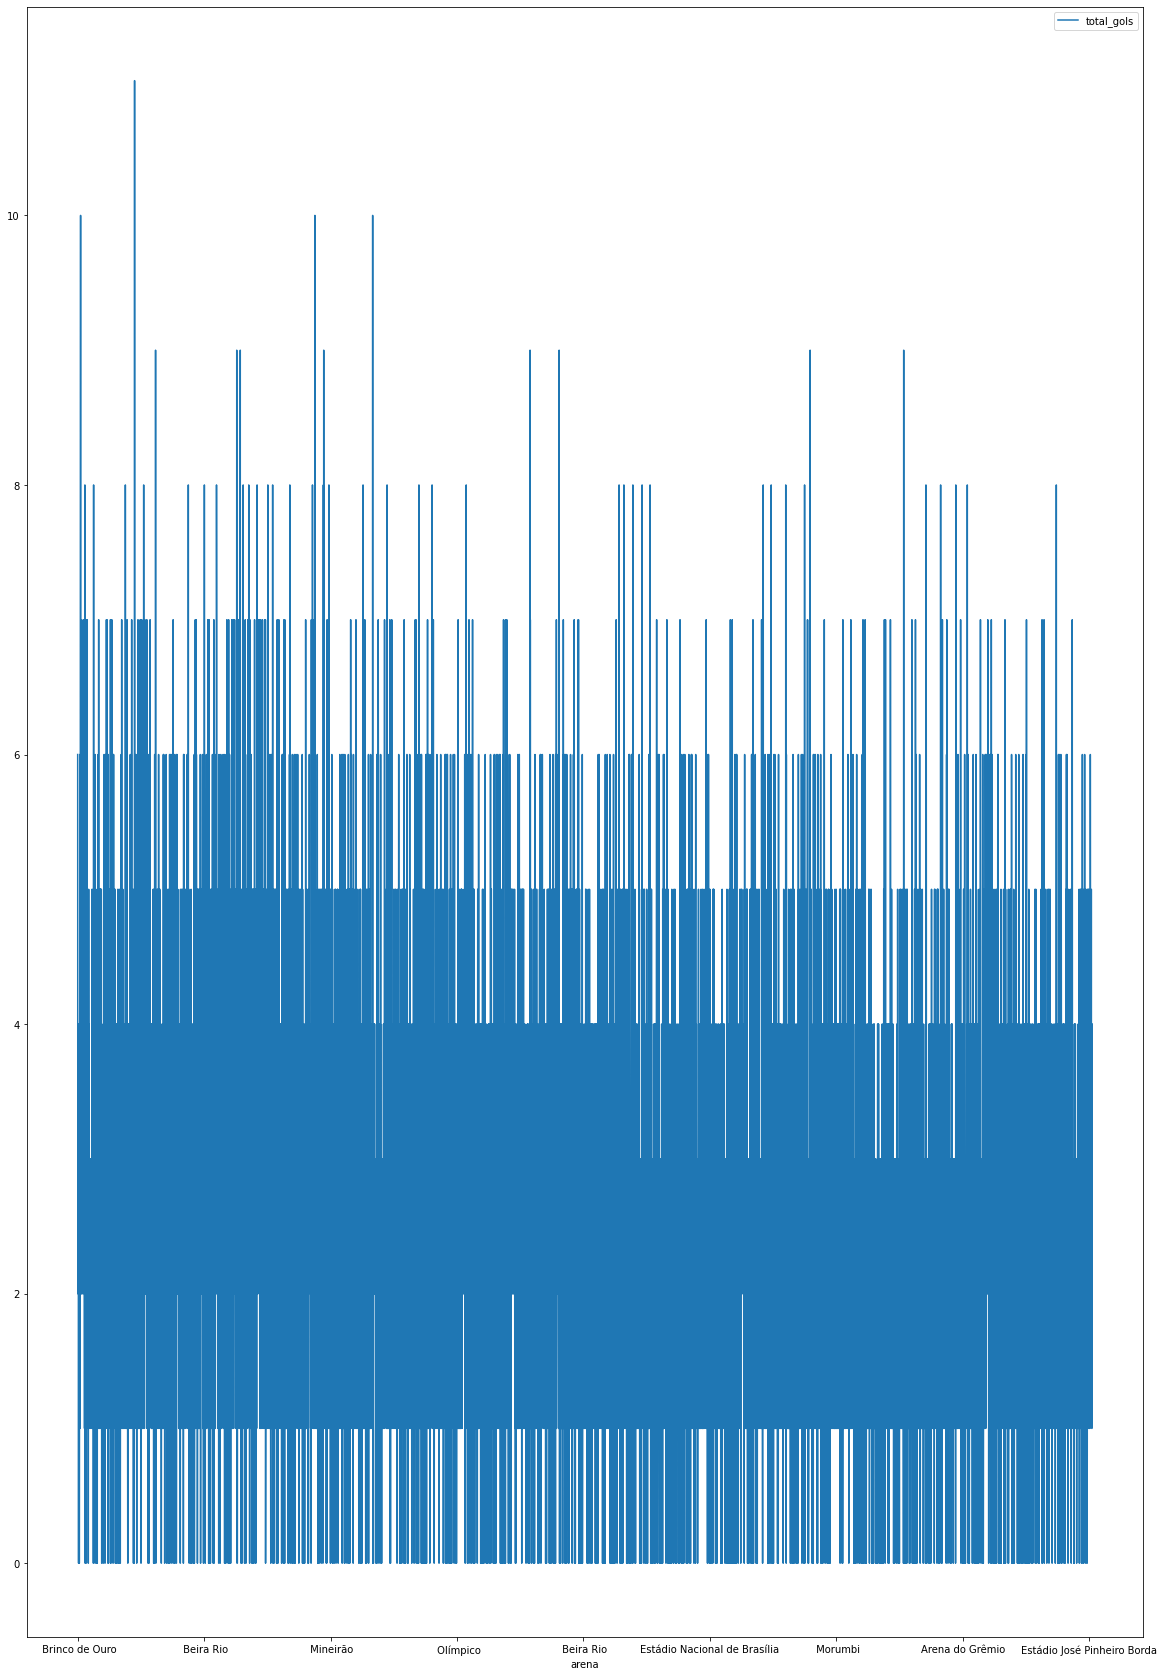

In [112]:
new_df_index_mandante.plot('arena','total_gols', figsize=(20, 30))

In [117]:
df_full_nnull['mandante'] == df_full_nnull['vencedor']

0        True
1        True
2       False
3       False
4       False
        ...  
8020     True
8021    False
8022    False
8023     True
8024    False
Length: 8025, dtype: bool

## Início manipulação dados do data set Estatisticas Full

``Verificar o conteúdo do data set``

In [2]:
df_origin_2 = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')

In [3]:
df_origin_2.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [4]:
valores_1 = df_origin_2.iloc[0:1, 3]

print(valores_1)

print(type(valores_1))

0    0
Name: chutes, dtype: int64
<class 'pandas.core.series.Series'>


``Verificar a quantidade de dados``

In [6]:
len(df_origin_2["partida_id"])

16050

``Verificar se há dados nulos``

In [7]:
df_origin_2.isna().sum()

partida_id            0
rodata                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

``Estatisticamente, as colunas posse de bole e precissão de passes possuem ~50% dos dados nulos, afetando a avaliação que proveria dela.``

``Neste cenário, é mais vantajoso a exclusão total.``

In [8]:
df_statistic_full_nnull = df_origin_2.drop(['posse_de_bola', 'precisao_passes'], axis=1)

In [9]:
df_statistic_full_nnull

,partida_id,rodata,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0,0,0,0,0,0
1,1,1,Vasco,0,0,0,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0,0,0,0,0,0
3,2,1,Gremio,0,0,0,0,0,0,0,0
4,3,1,Flamengo,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,351,19,6,0,0,4
16046,8024,38,Internacional,15,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,306,17,3,0,2,5
16048,8025,38,Goias,6,2,330,12,2,0,1,3


``A coluna 1 está com nome inadequado, não prejudicado a análise de dados mas incomodando``

In [10]:
df_statistic_full_nnull_rename = df_statistic_full_nnull.rename(columns={"rodata": "rodada"})

In [26]:
df_statistic_full_nnull_rename

,partida_id,rodada,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0,0,0,0,0,0
1,1,1,Vasco,0,0,0,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0,0,0,0,0,0
3,2,1,Gremio,0,0,0,0,0,0,0,0
4,3,1,Flamengo,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,351,19,6,0,0,4
16046,8024,38,Internacional,15,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,306,17,3,0,2,5
16048,8025,38,Goias,6,2,330,12,2,0,1,3


``Note, as colunas chutes a escanteios demostrando muitos dados em zero. O que pode comprometer a análise dos dados por não serem reais.``

``Até onde vão esses dados zerados?``

In [12]:
# avaliando a retirada dos dados zerados, via estatistica descritiva

df_statistic_full_nnull_rename.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000
mean,4013.000000,20.163240,4.841308,1.207975,159.068910,5.677695,0.862368,0.047664,0.613271,1.976947
std,2316.690109,11.465597,6.924779,2.280282,213.129689,7.793185,1.416964,0.232900,1.209620,3.131383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4013.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6019.000000,30.000000,10.000000,2.000000,374.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [23]:
# Script que vare cada coluna, verificando os valores e retornando o índice de cada coluna onde está o último valor zerado.

def minimum_value(row):
    row['chutes'] = row['chutes']-1
    return row

df_statistic_full_nnull_rename.apply(minimum_value, axis='columns')
    

    

,partida_id,rodada,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,-1,0,0,0,0,0,0,0
1,1,1,Vasco,-1,0,0,0,0,0,0,0
2,2,1,Athletico-PR,-1,0,0,0,0,0,0,0
3,2,1,Gremio,-1,0,0,0,0,0,0,0
4,3,1,Flamengo,-1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,16,7,351,19,6,0,0,4
16046,8024,38,Internacional,14,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,10,2,306,17,3,0,2,5
16048,8025,38,Goias,5,2,330,12,2,0,1,3


In [20]:
agrupamento_media = df_statistic_full_nnull_rename.groupby('chutes').chutes_no_alvo.mean()

In [28]:
new_df = df_statistic_full_nnull_rename.set_index('clube')

new_df.head()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
Guarani,1,1,0,0,0,0,0,0,0,0
Vasco,1,1,0,0,0,0,0,0,0,0
Athletico-PR,2,1,0,0,0,0,0,0,0,0
Gremio,2,1,0,0,0,0,0,0,0,0
Flamengo,3,1,0,0,0,0,0,0,0,0


In [37]:
new_df.groupby('clube').mean()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
America-MG,6163.800000,19.500000,10.331579,2.542105,311.789474,11.894737,1.563158,0.089474,1.268421,3.915789
America-RN,2136.184211,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Athletico-PR,4112.590296,20.110512,4.884097,1.301887,167.495957,5.788410,0.835580,0.036388,0.625337,1.936658
Atletico-GO,5610.469925,19.500000,7.056391,2.124060,225.056391,8.635338,1.319549,0.067669,0.857143,3.048872
Atletico-MG,4227.838057,20.085020,5.900135,1.480432,197.437247,5.933873,0.851552,0.032389,0.757085,2.466937
Avai,5067.680451,19.500000,6.578947,1.315789,211.454887,8.353383,1.409774,0.082707,0.842105,2.718045
Bahia,4967.360825,19.974227,6.533505,2.167526,194.636598,7.878866,1.054124,0.072165,0.652062,2.677835
Barueri,2896.105263,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Botafogo-RJ,4122.574468,19.907295,4.308511,1.139818,138.481763,5.027356,0.802432,0.034954,0.516717,1.638298


In [38]:
new_df_nnull_xy = new_df.drop(['America-RN', 'Barueri', 'Brasiliense', 'Brasiliense', 'Gremio Prudente', 'Guarani', 'Ipatinga', 'Nautico', 'Paysandu', 'Portuguesa', 'Santo Andre', 'Sao Caetano'], axis=0)

In [40]:
new_df_nnull_xy.groupby('clube').mean()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
America-MG,6163.800000,19.500000,10.331579,2.542105,311.789474,11.894737,1.563158,0.089474,1.268421,3.915789
Athletico-PR,4112.590296,20.110512,4.884097,1.301887,167.495957,5.788410,0.835580,0.036388,0.625337,1.936658
Atletico-GO,5610.469925,19.500000,7.056391,2.124060,225.056391,8.635338,1.319549,0.067669,0.857143,3.048872
Atletico-MG,4227.838057,20.085020,5.900135,1.480432,197.437247,5.933873,0.851552,0.032389,0.757085,2.466937
Avai,5067.680451,19.500000,6.578947,1.315789,211.454887,8.353383,1.409774,0.082707,0.842105,2.718045
Bahia,4967.360825,19.974227,6.533505,2.167526,194.636598,7.878866,1.054124,0.072165,0.652062,2.677835
Botafogo-RJ,4122.574468,19.907295,4.308511,1.139818,138.481763,5.027356,0.802432,0.034954,0.516717,1.638298
Bragantino,7455.131579,19.500000,14.359649,4.596491,413.201754,15.122807,2.192982,0.114035,1.157895,5.578947
CSA,6696.605263,19.500000,10.315789,3.026316,315.447368,14.105263,2.157895,0.105263,1.500000,3.105263


In [41]:
new_df_nnull_xy.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000
mean,4135.195384,20.116063,5.153402,1.285847,169.323252,6.043706,0.917960,0.050736,0.652805,2.104391
std,2314.299232,11.432280,7.031044,2.331259,215.908106,7.901707,1.444366,0.239966,1.237619,3.188967
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2123.250000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4217.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6140.750000,30.000000,11.000000,2.000000,385.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [ ]:
git config --global http.sslVerify false